<center>
    
# Patrones de Turing

### Juan Sebastian Sierra Jaraba - jsierraj@unal.edu.co 
### Departamento de Física, Facultad de Ciencias, Sede Bogotá
### Universidad Nacional de Colombia
    
</center>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

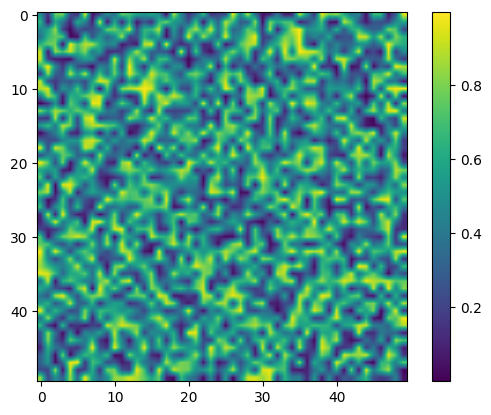

In [2]:
lx, ly, h, dt, tmax = 1, 1, 0.02, 0.001, 10
constants = 0.00028, 0.005, 0.1, -0.005

initPhi = np.random.rand(int(np.round(lx/h)), int(np.round(ly/h)))
initPsi = np.random.rand(int(np.round(lx/h)), int(np.round(ly/h)))

plt.imshow(initPhi, interpolation='bilinear')
plt.colorbar()
plt.show()

In [3]:
def Laplacian(M, x, y, h):
    return (M[x+1,y] + M[x-1,y] + M[x,y+1] + M[x,y-1] - 4*M[x,y])/h**2

In [4]:
def solve(lx, ly, h, dt, tmax, constants, initPhi, initPsi):
    a, b, tau, kappa = constants
    Nt, Nx, Ny = int(np.round(tmax/dt))+1, int(np.round(lx/h)), int(np.round(ly/h))
    
    Phi = np.zeros((Nt, Nx, Ny))
    Psi = np.zeros((Nt, Nx, Ny))
    
    Phi[0,:,:] = initPhi
    Psi[0,:,:] = initPsi
    
    Phi[0, 0,:] = Phi[0, 1,:]
    Phi[0,-1,:] = Phi[0,-2,:]
    Phi[0,:, 0] = Phi[0,:, 1]
    Phi[0,:,-1] = Phi[0,:,-2]
        
    Psi[0, 0,:] = Psi[0, 1,:]
    Psi[0,-1,:] = Psi[0,-2,:]
    Psi[0,:, 0] = Psi[0,:, 1]
    Psi[0,:,-1] = Psi[0,:,-2]
        
    for t in range(Nt-1):
        for x in range(1, Nx -1):
            for y in range(1, Ny -1):
                Phi[t+1,x,y] = Phi[t,x,y] + dt*(a*Laplacian(Phi[t,:,:],x,y,h) + Phi[t,x,y] - Phi[t,x,y]**3 - Psi[t,x,y] + kappa)
                Psi[t+1,x,y] = Psi[t,x,y] + (dt/tau)*(b*Laplacian(Psi[t,:,:],x,y,h) + Phi[t,x,y] - Psi[t,x,y])
        
        Phi[t+1, 0,:] = Phi[t+1, 1,:]
        Phi[t+1,-1,:] = Phi[t+1,-2,:]
        Phi[t+1,:, 0] = Phi[t+1,:, 1]
        Phi[t+1,:,-1] = Phi[t+1,:,-2]
        
        Psi[t+1, 0,:] = Psi[t+1, 1,:]
        Psi[t+1,-1,:] = Psi[t+1,-2,:]
        Psi[t+1,:, 0] = Psi[t+1,:, 1]
        Psi[t+1,:,-1] = Psi[t+1,:,-2]
        
    return Phi, Psi

In [5]:
Phi, Psi = solve(lx, ly, h, dt, tmax, constants, initPhi, initPsi)

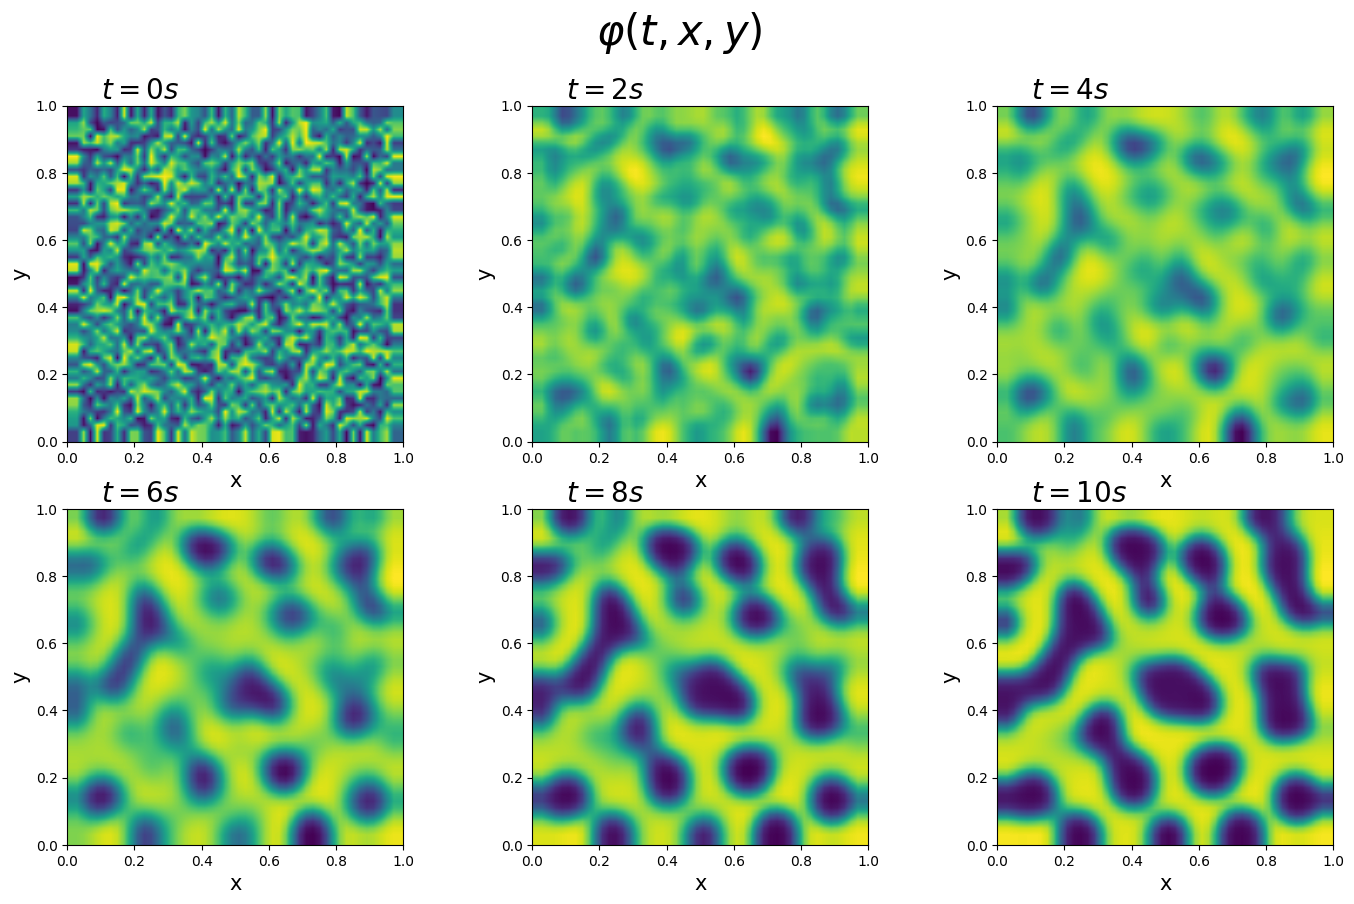

In [6]:
times = [0, 2, 4, 6, 8, 10]

fig = plt.figure(figsize=(17, 9.6))
fig.suptitle(r"$\varphi (t, x, y)$", size=30)

for index in range(len(times)):
    ax = fig.add_subplot(2,3,index+1)
    ax.imshow(Phi[int(times[index]/dt),:,:],interpolation='bilinear', extent=[0,lx,0,ly])
    ax.set_xlabel("x", size=15)
    ax.set_ylabel("y", size=15)
    ax.text(0.1, 1.02,r"$t = {}s$".format(times[index]), size=20)

plt.savefig("patrones_de_Turing.png")

En la imagen anterior se muestra como el patron que se observa en t=10s empieza a aparecer en t=4s y se va haciendo cada vez mas claro, por los que se espera que el patron converja a un estado estable.